# Machine Learning Lifecycle Example

<h1>1. Define Objective</h1>
<p>Objective: Infer how IQ, Years Experience, and Age affects income using a linear model</p>

# 2. Collect Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
tf.__version__  ## tensorflow 的版本

'1.14.0'

<h3> 產生資料

In [3]:
# 隨機點(種子)設定
np.random.seed(555)
###  用 numpy 的 隨機常態分配產生資料
#    np.random.normal(平均, 標準差, 產生幾個樣本) 預設出來是浮點數型態 (float)

#  IQ  => x1
X1 = np.random.normal(100, 15, 200).astype(int)

#  Years Experience => x2
X2 = np.random.normal(10, 4.5, 200)

#  Age => x3
X3 = np.random.normal(32, 4, 200).astype(int)

dob = np.datetime64("2017-10-31") - 365*X3   ## 生日
b = 5
er = np.random.normal(0, 1.5, 200)



Y = np.array([0.3*x1 + 1.5*x2 + 0.83*x3 + b + e for x1, x2, x3, e in zip(X1, X2, X3, er)])

# 3. Data Cleaning

In [4]:
cols = ["iq", "years_experience", "dob"]
df = pd.DataFrame(list(zip(X1, X2, dob)), columns=cols)
df["income"] = Y

In [5]:
df

,iq,years_experience,dob,income
0,102,3.134666,1994-11-06,58.665854
1,105,15.245371,1992-11-06,78.989823
2,83,2.391084,1988-11-07,57.564307
3,103,9.606721,1984-11-08,75.783867
4,97,11.134619,1981-11-09,82.547093
5,106,8.270241,1986-11-08,71.769303
6,87,7.236736,1982-11-09,69.221176
7,132,13.068419,1993-11-06,84.567604
8,105,3.284415,1986-11-08,68.505253
9,94,11.781596,1996-11-05,67.927813


In [6]:
df.corr()

,iq,years_experience,income
iq,1.000000,-0.055967,0.406406
years_experience,-0.055967,1.000000,0.790672
income,0.406406,0.790672,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq                  200 non-null int64
years_experience    200 non-null float64
dob                 200 non-null datetime64[ns]
income              200 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.3 KB


In [8]:
df.describe()

,iq,years_experience,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.708405,75.177962
std,14.991253,4.654536,8.889551
min,62.000000,-5.789565,49.467100
25%,88.500000,6.603565,69.391361
50%,99.000000,10.021919,75.180707
75%,108.250000,12.927809,80.739804
max,134.000000,21.889216,98.380710


<h3>清理資料：因為年資不會有負的，故這邊做個過濾的動作

In [9]:
df = df[df["years_experience"] >= 0]
df.describe()

,iq,years_experience,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.963718,75.603845
std,14.769628,4.332578,8.424493
min,62.000000,0.084480,54.325402
25%,88.500000,6.940314,69.619532
50%,99.000000,10.192384,75.327426
75%,108.250000,12.967590,80.798796
max,134.000000,21.889216,98.380710


# 4. EDA

In [10]:
df.describe(include=["datetime64"])

,dob
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


# <h3>畫圖

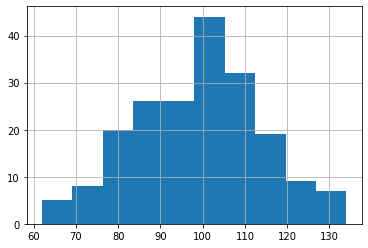

In [16]:
df.iq.hist(bins=10)

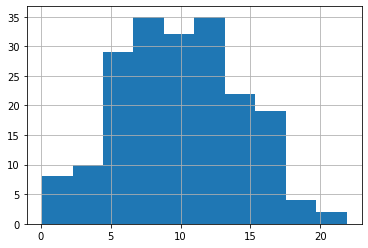

In [23]:
df.years_experience.hist(bins=10)

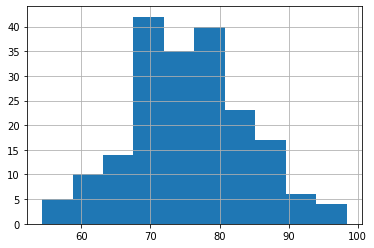

In [24]:
df.income.hist(bins=10)

散佈圖


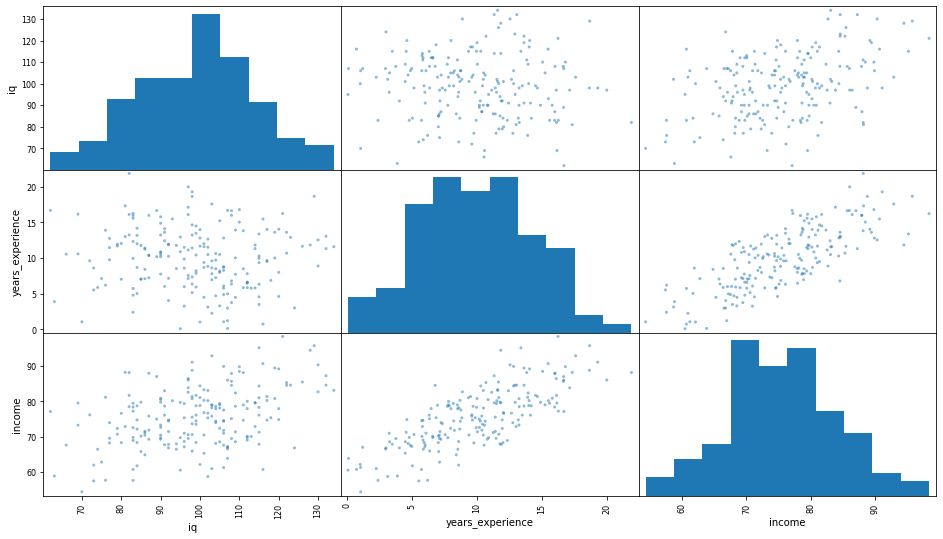

In [25]:
import matplotlib.pyplot as plt
## 為了確保圖可以畫在 jupyter notebook上
%matplotlib inline  

print("散佈圖")
pd.plotting.scatter_matrix(df, figsize=(16, 9));  # figsize=(圖寬, 圖長)

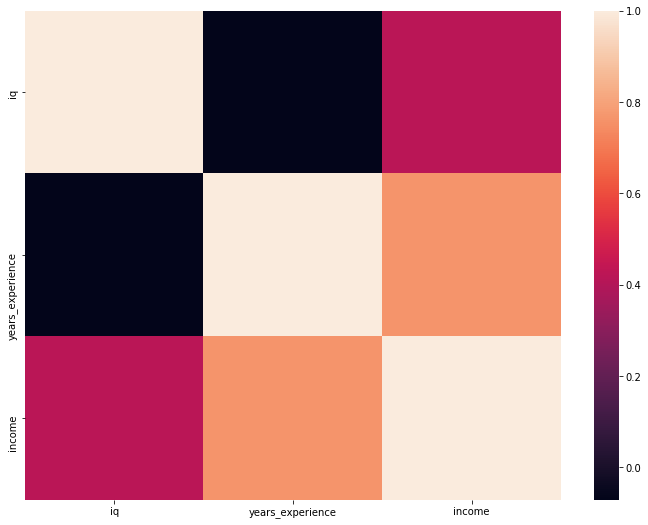

In [26]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(df.corr());

# 5. Data Processing/ Feature Engineering

In [27]:
from datetime import datetime as dt

df["age"] = df["dob"].apply(lambda x : (dt.strptime("2017-10-31", "%Y-%m-%d") - x).days/365)
df.drop("dob", axis=1, inplace=True)  ## 移除 出生日這col

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
df.head()

,iq,years_experience,income,age
0,102,3.134666,58.665854,23.0
1,105,15.245371,78.989823,25.0
2,83,2.391084,57.564307,29.0
3,103,9.606721,75.783867,33.0
4,97,11.134619,82.547093,36.0


<h3>這時候我們再畫一次圖

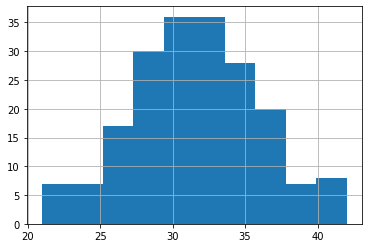

In [29]:
df.age.hist(bins=10)

散佈圖


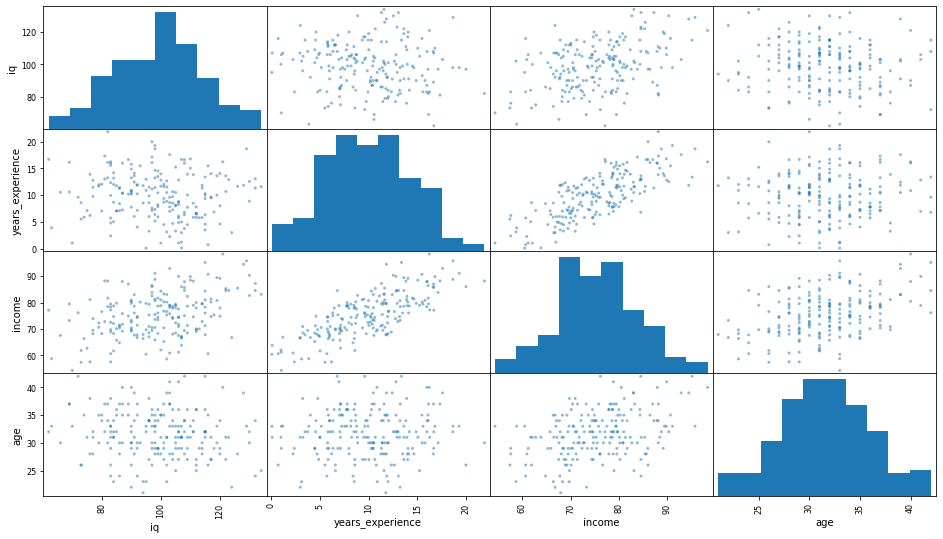

In [30]:
import matplotlib.pyplot as plt
## 為了確保圖可以畫在 jupyter notebook上
%matplotlib inline  

print("散佈圖")
pd.plotting.scatter_matrix(df, figsize=(16, 9));  # figsize=(圖寬, 圖長)

相關係數圖


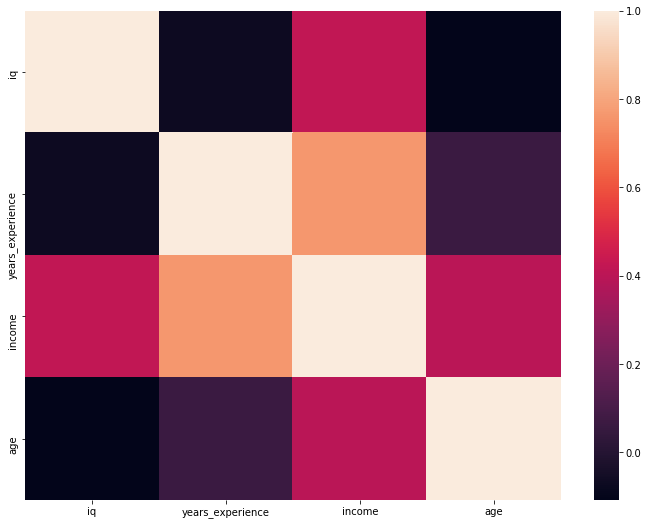

In [31]:
import seaborn as sns
plt.figure(figsize=(12,9))
print("相關係數圖")
sns.heatmap(df.corr());

# 6. Train/ Evaluate Model

In [32]:
import tensorflow as tf

In [33]:
# train/ test split
X = df.iloc[:, [0,1,3]]
Y = df.age

tr_idx = X.sample(frac=0.67).index ## 隨機抽樣 整母體的 67% 並取出他的index
Xtr = X[X.index.isin(tr_idx)].values
Xts = X[~X.index.isin(tr_idx)].values

Ytr = Y[Y.index.isin(tr_idx)].values
Yts = Y[~Y.index.isin(tr_idx)].values

 <h3> create Model

<h3>Getting TensorBoard Summaries</h3>
<ul>
<li>create summaries</li>
<li>merge summaries</li>
<li>create a summary weiter</li>
<li>run merged summaries with model in a session</li>
<li>use the writer to write the output</li>

In [34]:
tf.reset_default_graph()

In [35]:
sess = tf.Session()

### 新增變數
# 權重大家一開始都是0.1

w =  tf.get_variable(name="w", initializer=[[0.1], [0.1], [0.1]])

# ------- 要在Tensorboard 上面顯示的 --------- 
tf.summary.scalar("wmean", tf.reduce_mean(w))
tf.summary.scalar("wsum", tf.reduce_sum(w))
tf.summary.histogram("weight", w)



# 截距項
b = tf.get_variable(name="b", initializer=0.)

# ------- 要在Tensorboard 上面顯示的 --------- 
tf.summary.scalar("intercept", b)



## 產生輸入的placeholders
x = tf.placeholder("float32", name="x")
y = tf.placeholder("float32", name="y_true")

# 產生線性模型
y_hat = tf.reshape(tf.matmul(x,w) + b, [-1,], name="y_hat")

<h3>產生 Loss and test score function

In [36]:
import os
import shutil

## 檢查是否 path 路徑存在，如果沒有 就創立
def chech_and_mkdir(path):
    if not(os.path.isdir(path)):
        os.makedirs(path)


def delete_mkdir(path):
    if os.path.isdir(path):
        shutil.rmtree(path)

In [37]:
mse = tf.reduce_mean(tf.square(y - y_hat), name = "mse")
rmse = tf.sqrt(mse, name="rmse")

# ------- 要在Tensorboard 上面顯示的 --------- 
tf.summary.scalar("lose_rmse", rmse)

# 測試分數
test_nrmse = tf.divide(rmse, tf.abs(tf.reduce_mean(y)), name="nrmse")
tf.summary.scalar("test_nrmse", test_nrmse)

#  合併所有的 summary 並產生一個writer物件 要記錄我們training的時候
#  summary   存放的位置要記起來
summaries = tf.summary.merge_all()

tensorbaord_log_path = "./tmp/linear_logs"
delete_mkdir(tensorbaord_log_path)
chech_and_mkdir(tensorbaord_log_path)
writer = tf.summary.FileWriter( logdir = tensorbaord_log_path, graph=sess.graph)

<h3>Training/Evaluation

In [38]:
## restart 變數 w & b
init = tf.variables_initializer([w, b])
sess.run(init)

# 跑 優化器 
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(rmse)

for i in range(800):
    if (i%50 == 0) and (i > 0):
        nrmse = sess.run(test_nrmse, {x: Xts, y: Yts})
        print("Test nrmse : ", nrmse)
    else:
        sess.run(train, {x: Xtr, y: Ytr})
        

Test nrmse :  0.17666948
Test nrmse :  0.1822808
Test nrmse :  0.17207682
Test nrmse :  0.18001324
Test nrmse :  0.1715996
Test nrmse :  0.17871684
Test nrmse :  0.17207451
Test nrmse :  0.17779756
Test nrmse :  0.1726793
Test nrmse :  0.17709967
Test nrmse :  0.17321551
Test nrmse :  0.1765661
Test nrmse :  0.17364691
Test nrmse :  0.17616148
Test nrmse :  0.17398208


<h3>跑 summaries

In [39]:
## restart 變數 w & b
init = tf.variables_initializer([w, b])
sess.run(init)

# 跑 優化器 
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = opt.minimize(rmse)

for i in range(800):
    if (i%50 == 0) and (i > 0):
        smry, nrmse = sess.run([summaries, test_nrmse], {x: Xts, y: Yts})
        writer.add_summary(smry, i)
        print("Test nrmse : ", nrmse)
    else:
        smry, _ = sess.run([summaries, train], {x: Xtr, y: Ytr})
        writer.add_summary(smry, i)

Test nrmse :  0.1759226
Test nrmse :  0.16953021
Test nrmse :  0.16315778
Test nrmse :  0.15680589
Test nrmse :  0.15047616
Test nrmse :  0.14417048
Test nrmse :  0.1378909
Test nrmse :  0.1316398
Test nrmse :  0.12541968
Test nrmse :  0.11923363
Test nrmse :  0.11308494
Test nrmse :  0.10697747
Test nrmse :  0.10091571
Test nrmse :  0.09490463
Test nrmse :  0.08895011


In [40]:
sess.run([w, b])

[array([[0.10957058],
        [0.15735707],
        [0.5988676 ]], dtype=float32), 0.00856909]

開啟TensorBoard

In [ ]:
## !tensorboard --logdir=./tmp/linear_logs
## https://cocalc.com/209908b3-b333-4f7b-b00a-643d9a570ca5/server/6006

# 輸出資料

In [41]:
output_data_path = "./output_data"
delete_mkdir(output_data_path)
chech_and_mkdir(output_data_path)

Xtr.dump(os.path.join(output_data_path, "Xtr.npy"))
Ytr.dump(os.path.join(output_data_path, "Ytr.npy"))
Xts.dump(os.path.join(output_data_path, "Xts.npy"))
Yts.dump(os.path.join(output_data_path, "Yts.npy"))

df.to_csv(os.path.join(output_data_path, "data.csv"), index=False)